---------
### Imports + Google Drive

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [2]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [3]:
"""# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')"""

"# Mount Google Drive\nfrom google.colab import drive\ndrive.mount('/content/drive')"

-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file salaries.csv, which is a simple comma-separated list of labels and values.

In [4]:
url='https://raw.githubusercontent.com/ogemarques/data-files/main/salaries.csv'
salaries = pd.read_csv(url) 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


In [6]:
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [7]:
print("Null value found in the data across each column\n",salaries.isnull().sum())
print("Number of attributes in the given dataset",salaries.shape[1])

Null value found in the data across each column
 earn      0
height    0
sex       0
ed        0
age       0
race      0
dtype: int64
Number of attributes in the given dataset 6


*Enter your text here*

*   earn = annual salary of the employee in the company(Type of currency is not mentioned.Will check it later)
*   height = height of the employee in inches(Too many decimal digits.We can adjust it later)
*   sex = gender of the employee(nominal value)
*   ed = number of years of education of the employee(Educational qualification details are missing)
*   age = Actual age of the employee(numerical value)
*   race = Race of the employee(nominal value)



In [8]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


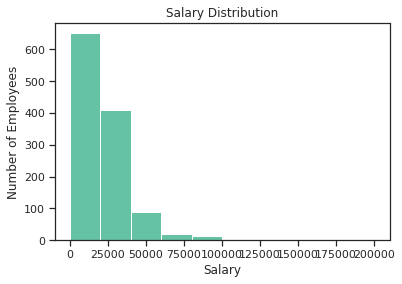

In [9]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

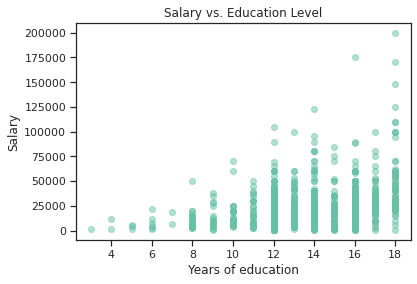

In [10]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [11]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

........Analyzing.........
Total Headcount of the employees: 1192
Number of female and male employess
 female    687
male      505
Name: sex, dtype: int64
Percentage of female and male employees
 female    57.6
male      42.4
Name: sex, dtype: float64
min female salary $200.00
max female salary $123000.00
avg female salary $18280.20
median female salary $15000.00

min male salary $1000.00
max male salary $200000.00
avg male salary $29786.13
median male salary $25000.00



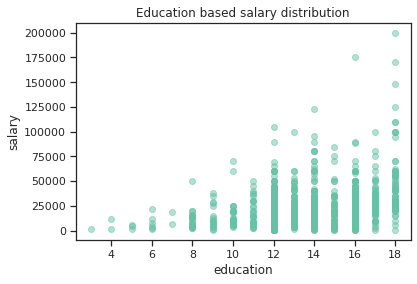

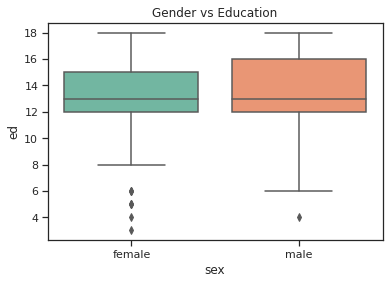

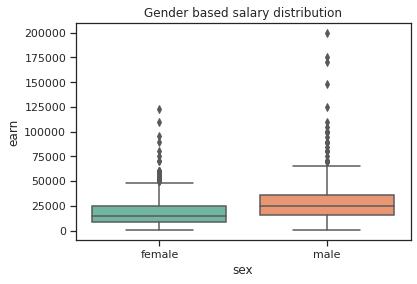

In [12]:
print("........Analyzing.........")
print("Total Headcount of the employees:",salaries['sex'].count())
print("Number of female and male employess\n",salaries['sex'].value_counts())
print("Percentage of female and male employees\n",salaries['sex'].value_counts(normalize=True).mul(100).round(1))
#Creating two numpy arrays to store the salaries of female and male employees
sal_female=np.array(salaries[salaries['sex']=='female']['earn'])
sal_male=np.array(salaries[salaries['sex']=='male']['earn'])
#Computing min,max,avg,median salary of the female and male employee groups
print("min female salary ${:6.2f}\nmax female salary ${:6.2f}\navg female salary ${:6.2f}\nmedian female salary ${:6.2f}\n".format(np.min(sal_female),np.max(sal_female),np.mean(sal_female),np.median(sal_female)))
print("min male salary ${:6.2f}\nmax male salary ${:6.2f}\navg male salary ${:6.2f}\nmedian male salary ${:6.2f}\n".format(np.min(sal_male),np.max(sal_male),np.mean(sal_male),np.median(sal_male)))
#Output of the above code cell shows a positive Correlation coefficient value of 0.3399 between education and salary attributes in the given dataset
#Plotting to visualize the results
#Plot1 between education level and salary of the employees
plt.title('Education based salary distribution')
plt.ylabel('salary')
plt.xlabel('education')
plt.scatter(salaries['ed'],salaries['earn'],alpha=0.5)
plt.show()
#Plot2 between gender and education level
plt.title('Gender vs Education')
sns.boxplot(x="sex",y="ed",data=salaries,order=["female","male"])
plt.show()
#Plot3 between gender and salary of the employees
plt.title('Gender based salary distribution')
sns.boxplot(x="sex",y="earn",data=salaries,order=["female","male"])
plt.show()

Observation:
With the given data,
*  First two plots - shows both female and male emlpoyees are more or less equal in their education level with median around 13yrs, maximum 18yrs, minimum around 7 years with few outliers.
*  Second plot -  shows male employees earning more than female employees with many outliers.
So,Gender bias is seen to some extent with regards to salary but more details on education('ed') is required for further analysis.

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

H1:

..........Analyzing...........
maximum age:91
minimum age:18
 median age:38

average salary of employees globally	: $23154.77
average salary of employees between age 18-38: $20597.84
average salary of employees between age 38-65: $27947.63
average salary of employees between age 65-91: $18259.40
Finding deviation by method 1
deviation from the average salary of
group1: $2557
group2: $-4793
group3: $4895

Finding deviation by method 2
Salary deviation of all age group employees
 age
18    11452.226715
19     5608.833671
20     6350.010816
21     8175.805829
22    18205.060061
          ...     
86             NaN
87             NaN
88             NaN
89             NaN
91    14224.392196
Name: earn, Length: 72, dtype: float64
min age deviation:	11452.23
max age deviation:	14224.39
median age deviation:	30314.11

Correlation between salary and age attribute:  0.08100297364190615


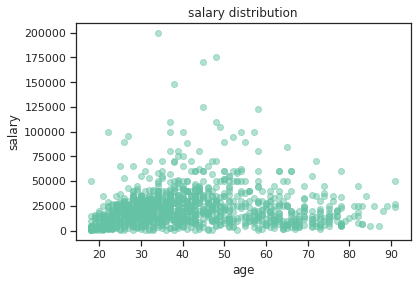

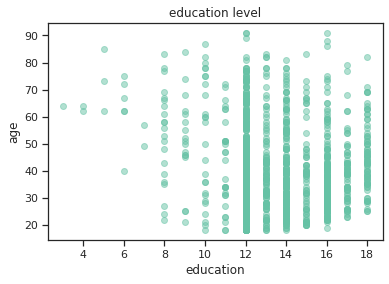

In [13]:
print("..........Analyzing...........")
#Computing min,max,median age of the employees
max_age=int(salaries['age'].max())
min_age=int(salaries['age'].min())
median_age=int(salaries['age'].median())
print("maximum age:{:2.0f}\nminimum age:{:2.0f}\n median age:{:2.0f}\n".format(max_age,min_age,median_age))
#Computing average salary of the employees globally
avg_salary_global=np.mean(salaries['earn'])
print("average salary of employees globally\t: ${:6.2f}".format(avg_salary_global))
#Computing min,max,median age employees' salary 
"""print("max age salary details\n",salaries[salaries['age']==max_age]['earn'])
print("min age salary details\n",salaries[salaries['age']==min_age]['earn'])
print("median salary details\n",salaries[salaries['age']==median_age]['earn'])"""
#Computing the deviation in salary for different age groups in two different methods
#method 1
avg_salary_group1=np.mean(salaries[salaries['age'].between(min_age, median_age)]['earn'])
print("average salary of employees between age 18-38: ${:6.2f}".format(avg_salary_group1))
avg_salary_group2=np.mean(salaries[salaries['age'].between(median_age, 65)]['earn'])
print("average salary of employees between age 38-65: ${:6.2f}".format(avg_salary_group2))
avg_salary_group3 = np.mean(salaries[salaries['age'] > 65]['earn'])
print("average salary of employees between age 65-91: ${:6.2f}".format(avg_salary_group3))
#Computing the salary difference of different age groups from the average salary across the company
print("Finding deviation by method 1")
print("deviation from the average salary of\ngroup1: ${:2.0f}\ngroup2: ${:2.0f}\ngroup3: ${:2.0f}".format(np.subtract(avg_salary_global,avg_salary_group1),np.subtract(avg_salary_global,avg_salary_group2),np.subtract(avg_salary_global,avg_salary_group3)))
#method 2
std=salaries.groupby('age')['earn'].agg('std')
print("\nFinding deviation by method 2")
print("Salary deviation of all age group employees\n",std)
print("min age deviation:\t{:6.2f}\nmax age deviation:\t{:6.2f}\nmedian age deviation:\t{:6.2f}\n".format(std.loc[min_age],std.loc[max_age],std.loc[median_age]))
#Computing Correlation Coefficient between salary and age attributes in the given dataset
salary=np.array(salaries['earn'])
act_age=np.array(salaries['age'])
corr, _ = pearsonr(salary,act_age)
print('Correlation between salary and age attribute: ',corr)
#Plotting 
#Plot1 between salary and age of the employees
plt.title('salary distribution')
plt.ylabel('salary')
plt.xlabel('age')
plt.scatter(salaries['age'],salaries['earn'],alpha=0.5)
plt.show()
#Plot2 between education level and age of the employees
plt.title('education level')
plt.ylabel('age')
plt.xlabel('education')
plt.scatter(salaries['ed'],salaries['age'],alpha=0.5)
plt.show()


Observation:With the given data,
  
  We can say,ageism is reflected in salary given to the employees in the company.

* From method1,
  The average salary of young group of employees is below global average which we may consider correct because of their low experience level in the company. 
  The average salary of older group of employees is below average as well which may be because of ageism.
  The average salary of medium age group employees is above average(well paid group).

* From method2,
  The deviation in salary of median age group employees is high compared to min and max age group employees.

* Correlation coefficient between salary and age is 0.08(almost neutral)from which we cannot come to a conclusion.
* Plot2- Shows the education level(number of years) of employees
in which a good number of older group of employees are well educated but paid less. 

  But this dataset doesn't have any details about the number of years of experience of the employees in the company and also educational details of the employees which are much needed for further analysis.
       

H2:

...........Analyzing..........
Number of female and male employess
 female    687
male      505
Name: sex, dtype: int64
min female salary $200.00
max female salary $123000.00
avg female salary $18280.20


min male salary $1000.00
max male salary $200000.00
avg male salary $29786.13


max no of years of education-female
 18
max no of years of education-male
 18


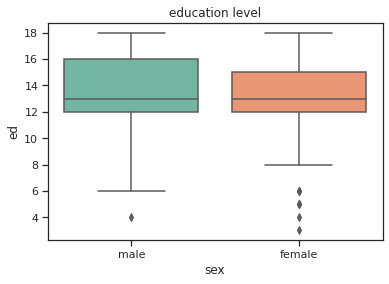

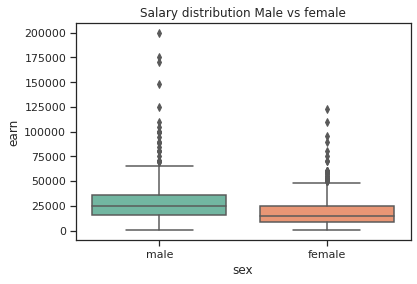

In [14]:
print("...........Analyzing..........")
#Computing distinct values of female and male employees
print("Number of female and male employess\n",salaries['sex'].value_counts())
#Computing min,max,average salary of female and male employees
sal_female=np.array(salaries[salaries['sex']=='female']['earn'])
sal_male=np.array(salaries[salaries['sex']=='male']['earn'])
print("min female salary ${:6.2f}".format(np.min(sal_female)))
print("max female salary ${:6.2f}".format(np.max(sal_female)))
print("avg female salary ${:6.2f}\n\n".format(np.mean(sal_female)))
print("min male salary ${:6.2f}".format(np.min(sal_male)))
print("max male salary ${:6.2f}".format(np.max(sal_male)))
print("avg male salary ${:6.2f}\n\n".format(np.mean(sal_male)))
#Computing the ed value most educated female and male employee
no_of_years_ed_f=salaries[salaries['sex']=='female']['ed'].max()
no_of_years_ed_m=salaries[salaries['sex']=='male']['ed'].max()
print("max no of years of education-female\n",no_of_years_ed_f)
print("max no of years of education-male\n",no_of_years_ed_m)
#Plotting
#Plot1 between education and gender
plt.title('education level')
sns.boxplot(x="sex",y="ed",data=salaries,order=["male","female"])
plt.show()
#Plot2 between salary and gender
plt.title('Salary distribution Male vs female')
sns.boxplot(x="sex",y="earn",data=salaries,order=["male","female"])
plt.show()


Observation:
With the given data,
*  First two plots - shows both female and male emlpoyees are more or less equal in their education level with median around 13yrs, maximum 18yrs, minimum around 7 years with few outliers.
*  Second plot -  shows male employees earning more than female employees with many outliers. 
* The maximum number of education years for both male and female are 18 but maximum female salary is less when compared to maximum male salary.

So,Gender bias is seen to some extent with regards to salary but more details on eduaction and experience are required for further analysis to come to a final conclusion.

H3:

...........Analyzing...........
Number of employees of different races
 white       989
black       112
hispanic     66
other        25
Name: race, dtype: int64
Max salary of whites
 200000.0
Max salary of blacks
 60000.0
Max salary of hispanics
 55000.0
Max salary of others
 110000.0
Avg salary global:$23154.77

Avg salary of whites:$23882.47

Avg salary of blacks:$19624.21

Avg salary of hispanics:$18263.64

Avg salary of others:$23096.64



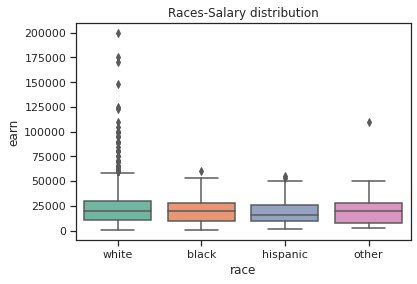

In [15]:
print("...........Analyzing...........")
#Computing number of employees in each race given in the dataset
print("Number of employees of different races\n",salaries['race'].value_counts())
#Computing max,average salary of the employees in each race
print("Max salary of whites\n",salaries[salaries['race']=='white']['earn'].max())
print("Max salary of blacks\n",salaries[salaries['race']=='black']['earn'].max())
print("Max salary of hispanics\n",salaries[salaries['race']=='hispanic']['earn'].max())
print("Max salary of others\n",salaries[salaries['race']=='other']['earn'].max())
print("Avg salary global:${:6.2f}\n".format(salaries['earn'].mean()))
print("Avg salary of whites:${:6.2f}\n".format(salaries[salaries['race']=='white']['earn'].mean()))
print("Avg salary of blacks:${:6.2f}\n".format(salaries[salaries['race']=='black']['earn'].mean()))
print("Avg salary of hispanics:${:6.2f}\n".format(salaries[salaries['race']=='hispanic']['earn'].mean()))
print("Avg salary of others:${:6.2f}\n".format(salaries[salaries['race']=='other']['earn'].mean()))
#Plotting
plt.title('Races-Salary distribution')
sns.boxplot(x="race",y="earn",data=salaries,order=["white","black","hispanic","other"])
plt.show()


Observation:With the given data,

* From the average salary of employees(no big difference is seen) in each disticnt race, no race bias is seen because the total number of white employees are more when compared to other three categories.
* But when we observe the plot, a huge number of outliers can be seen in the whites category compared to other three categories.This shows more whites are working in higher tier jobs.

So, Race bias is seen to some extent in the company at a higher tier employment positions but educational qualification of employees are needed for further analysis.

-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [18]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [19]:
data.dropna(inplace=True)
print(data.shape)
data.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
#Computing Number of 3 and 5 cylinder vhicles
t=data[data['cylinders'] == 3.0]['cylinders'].count()
print("Number of 3 cylinder vehicles",t)
f=data[data['cylinders'] == 5.0]['cylinders'].count()
data1=data
print("Number of 5 cylinder vehicles",f)
data=data[(data.cylinders != 3.0 ) & (data.cylinders != 5.0 )]
print(data.shape)
#Computing min,max,average fuel consumption of 4,6 and 8 cylinder vehicles
print("4 cylinder vehicles:\nmin fuel consumption:{:2.1f}\nmax fuel consumption:{:2.1f}\navg fuel consumption:{:2.1f}\n".format(data[data['cylinders']== 4.0]['mpg'].min(),data[data['cylinders']== 4.0]['mpg'].max(),data[data['cylinders']== 4.0]['mpg'].mean()))
print("6 cylinder vehicles:\nmin fuel consumption:{:2.1f}\nmax fuel consumption:{:2.1f}\navg fuel consumption:{:2.1f}\n".format(data[data['cylinders']== 6.0]['mpg'].min(),data[data['cylinders']== 6.0]['mpg'].max(),data[data['cylinders']== 6.0]['mpg'].mean()))
print("8 cylinder vehicles:\nmin fuel consumption:{:2.1f}\nmax fuel consumption:{:2.1f}\navg fuel consumption:{:2.1f}\n".format(data[data['cylinders']== 8.0]['mpg'].min(),data[data['cylinders']== 8.0]['mpg'].max(),data[data['cylinders']== 8.0]['mpg'].mean()))
#Computing Most and Least fuel efficient vehicle
n=data1['mpg'].max()
n1=data1['mpg'].min()
print("Most fuel efficient vehicle",data1[data1['mpg']==n]['car_name'])
print("Least fuel efficient vehicle",data1[data1['mpg']==n1]['car_name'])


Number of 3 cylinder vehicles 4
Number of 5 cylinder vehicles 3
(385, 9)
4 cylinder vehicles:
min fuel consumption:18.0
max fuel consumption:46.6
avg fuel consumption:29.3

6 cylinder vehicles:
min fuel consumption:15.0
max fuel consumption:38.0
avg fuel consumption:20.0

8 cylinder vehicles:
min fuel consumption:9.0
max fuel consumption:26.6
avg fuel consumption:15.0

Most fuel efficient vehicle 329    mazda glc
Name: car_name, dtype: object
Least fuel efficient vehicle 34    hi 1200d
Name: car_name, dtype: object


In the given dataset,
* There are '4' three cylinder vehicles and '3' five cylinder vehicles and the drop of these 7 rows has given a dataframe of shape (385,9).
* 8 cylinder vehicles consume less fuel compared to others given in the data.
* Most fuel efficient vehicle is mazda glc and least fuel effecient is hi 1200d.(both before and after dropping rows of 3 and 5 cylinder vehicles)

Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


Correlation between fuel efficiency and displacement: -0.8051269467104578
Correlation between fuel efficiency and weight of the vehicle: -0.8322442148315753
Correlation between fuel efficiency and horsepower of the vehicle: -0.7784267838977761


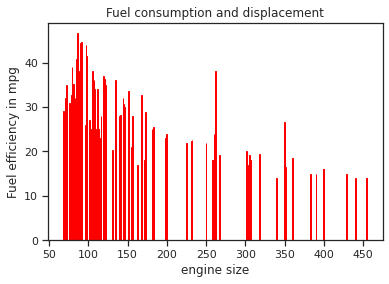

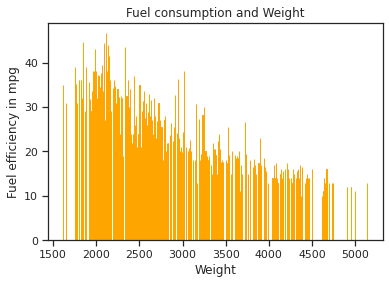

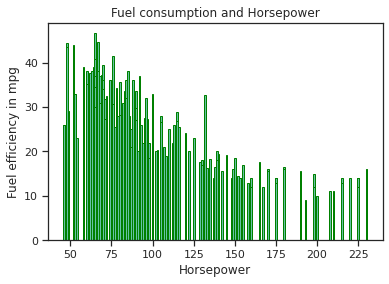

In [20]:
#Computing correlation coefficient for fuel efficiency and displacement,weight,horsepower
fe=np.array(data['mpg'])
disp=np.array(data['displacement'])
wt=np.array(data['weight'])
hp=np.array(data['horsepower'])
corr, _ = pearsonr(fe,disp)
print('Correlation between fuel efficiency and displacement:',corr)
corr1, _ =pearsonr(fe,wt)
print('Correlation between fuel efficiency and weight of the vehicle:',corr1)
corr2, _ =pearsonr(fe,hp)
print('Correlation between fuel efficiency and horsepower of the vehicle:',corr2)
#Plotting
#Plot1 between fuel consumption and displacement
plt.title("Fuel consumption and displacement")
plt.ylabel("Fuel efficiency in mpg")
plt.xlabel("engine size")
plt.bar(data['displacement'],data['mpg'], width=1, edgecolor="red", linewidth=1.0)
plt.show()
#Plot2 between fuel consumption and weight of the vehicle
plt.title("Fuel consumption and Weight")
plt.ylabel("Fuel efficiency in mpg")
plt.xlabel("Weight")
plt.bar(data['weight'],data['mpg'], width=1, edgecolor="orange", linewidth=1.0)
plt.show()
#Plot3 between fuel consumption and horsepower of the vehicle
plt.title("Fuel consumption and Horsepower")
plt.ylabel("Fuel efficiency in mpg")
plt.xlabel("Horsepower")
plt.bar(data['horsepower'],data['mpg'], width=1, edgecolor="green", linewidth=1.0)
plt.show()

Observation:
* Plot 1-Fuel efficiency is more when displacement(engine size) is less.
* Plot 2-Fuel efficiency is more when vehicle's weight is less.
* Plot 3-Fuel efficiency is more when horsepower is less.
* Correlation between 
                      fuel efficiency-displacement=negative
                      fuel efficiency-weight=negative
                      fuel efficiency-horsepower=negative
The above observations clearly say fuel efficiency is good in less upgraded vehicles.

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



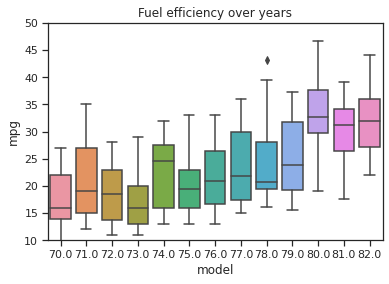

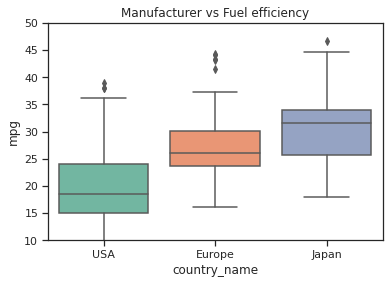

In [21]:
#Plotting
#Plot1 between fuel usage and car model(year of manufacturing)
plt.title('Fuel efficiency over years')
sns.boxplot(x="model",y="mpg",data=data,order=[70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0])
plt.ylim(10,50)
plt.show()
data['country_name']=data.origin.replace([1.0,2.0,3.0],['USA','Europe','Japan'])
#Plot2 bewteen fuel usage of cars that are manufactured by three different countries USA,Europe and Japan
plt.title('Manufacturer vs Fuel efficiency')
sns.boxplot(x="country_name",y="mpg",data=data,order=['USA','Europe','Japan'])
plt.ylim(10,50)
plt.show()

Observation:
* Plot 1 confirms that there is an improvement in the fuel efficiency over the years.
* The minimum point and the maximum point of the boxes in the plot over the years shows efficient fuel usage by new model cars.
* Cars manufactured in 1980 shows a brilliant fuel efficiency and its seen in the successive years also.
* Plot 2 shows that Japanese cars are fuel effcient than USA and European cars though few outliers are seen.
* The median value and maximum value of Japanese cars are far more than the other two which confirms the above conclusion.